# <u> Dissecting racial bias in an algorithm used to manage the health of populations </u>

# Part A: Data Access

In [1]:
import pandas as pd
url = "https://gitlab.com/labsysmed/dissecting-bias/-/raw/master/data/data_new.csv?inline=false"
df = pd.read_csv(url)

In [2]:
df

,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,race,...,trig_min-high_tm1,trig_min-normal_tm1,trig_mean-low_tm1,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t
0,1.987430,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,white,...,0,0,0,0,0,0,0,0,0,0
1,7.677934,0,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,white,...,0,1,0,0,1,0,0,1,4,3
2,0.407678,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
3,0.798369,0,1300.0,0.0,117.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
4,17.513165,0,1100.0,0.0,116.0,NaN,34.1,1.303333,53.0,white,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48779,0.611517,0,800.0,0.0,NaN,NaN,NaN,1.090000,148.0,white,...,0,0,0,0,0,0,0,0,0,0
48780,2.615933,0,2200.0,0.0,112.0,NaN,41.4,0.810000,172.0,white,...,0,1,0,0,1,0,0,1,1,1
48781,1.358926,0,800.0,0.0,105.0,NaN,NaN,NaN,NaN,white,...,0,1,0,0,1,0,0,1,1,0
48782,10.990318,0,1300.0,0.0,132.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,3,3


# Part B: Reproduce Fig. 1

Visualize risk score percentiles against mean number of active chronic conditions within that percentile. For example, I thought I would try spliting out male and female patients. I also think the figure looks a bit nicer with axes inverted. 

In [10]:
df.groupby('risk_score_t')["gagne_sum_t"].mean()


risk_score_t
0.000000       0.029412
0.016987       0.029851
0.033973       0.000000
0.050960       0.000000
0.067946       0.000000
                ...    
92.865636      0.000000
93.664005      9.000000
95.583489      6.000000
96.381858     10.000000
100.000000     9.500000
Name: gagne_sum_t, Length: 1582, dtype: float64

/var/folders/g2/ybhd80ns31sc72zl62c5qcjm0000gn/T/ipykernel_30966/2684477480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female["chronic_illness_mean"] = df_female.groupby("risk_score_t")["gagne_sum_t"].transform("mean")


Text(0, 0.5, 'Percentile risk score (from algorithm)')

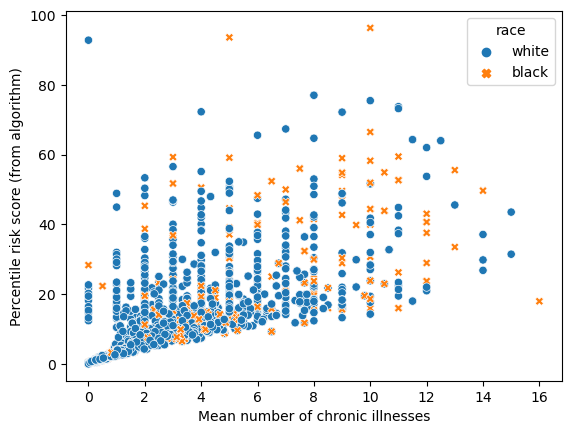

In [43]:
import seaborn as sns
from matplotlib import pyplot as plt

df_female = df[df["dem_female"] == True]
df_female["chronic_illness_mean"] = df_female.groupby("risk_score_t")["gagne_sum_t"].transform("mean")

sns.scatterplot(data=df_female, x="chronic_illness_mean", y="risk_score_t", hue="race", style="race")

plt.xlabel('Mean number of chronic illnesses')
plt.ylabel('Percentile risk score (from algorithm)')

/var/folders/g2/ybhd80ns31sc72zl62c5qcjm0000gn/T/ipykernel_30966/3522929856.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male["chronic_illness_mean"] = df_male.groupby("risk_score_t")["gagne_sum_t"].transform("mean")


Text(0, 0.5, 'Percentile risk score (from algorithm)')

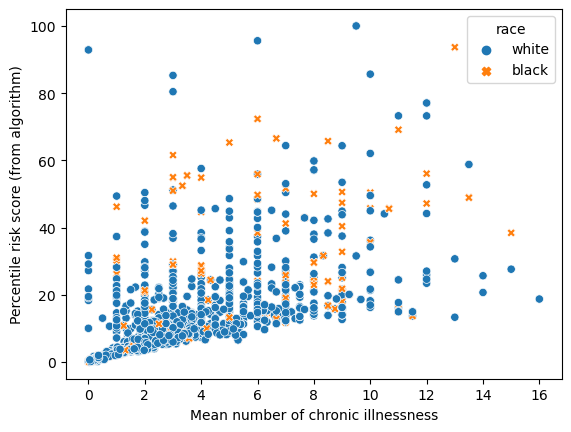

In [40]:
df_male = df[df["dem_female"] == False] #making an assumption they only had two gender options

chronic_illness_mean = df_male["gagne_sum_t"].mean()

df_male["chronic_illness_mean"] = df_male.groupby("risk_score_t")["gagne_sum_t"].transform("mean")

sns.scatterplot(data=df_male, x="chronic_illness_mean", y="risk_score_t", hue="race", style="race")

plt.xlabel('Mean number of chronic illnessness')
plt.ylabel('Percentile risk score (from algorithm)')